In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
train_df = pd.read_csv("../../01_input/train.csv")
test_df = pd.read_csv("../../01_input/test.csv")

CPU times: user 12 s, sys: 524 ms, total: 12.5 s
Wall time: 15.9 s


In [3]:
submit_flg=1 #全件処理かどうかをコントロール
grid_flg=1 #GridSearchをするかコントロール
SEED=12345
sample_num=10000
fold_num=5

#train関連
train_drop_col=['ID_code', 'target']
train_label='target'

#test関連
test_drop_col=['ID_code']

In [4]:
#x,y作成
x_train=train_df.drop(train_drop_col,axis=1)
y_train=train_df[train_label]
x_test=test_df.drop(test_drop_col,axis=1)

特徴量作成コードを記載

データ確認

7.281591


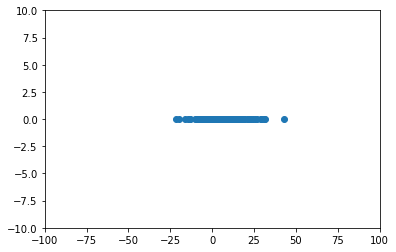

7.076817999999999


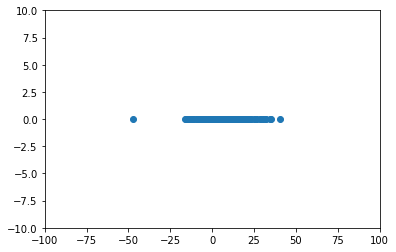

6.204483


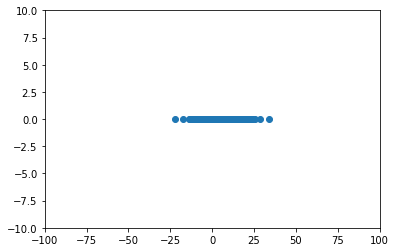

6.441159500000001


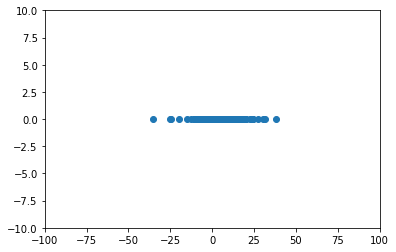

6.771155


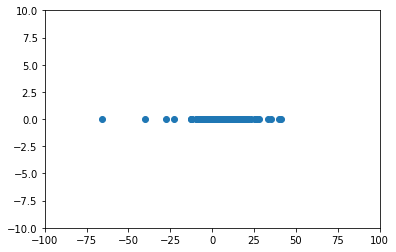

6.361607999999999


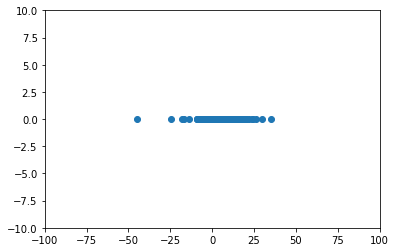

7.547245


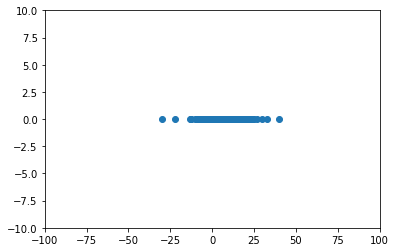

7.1925415


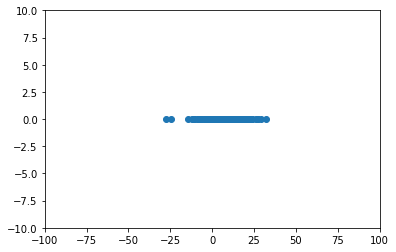

6.8486875000000005


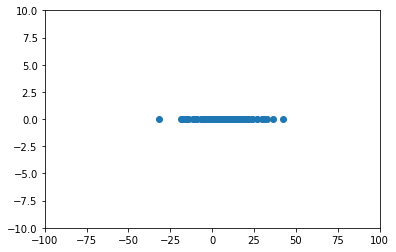

6.515577499999999


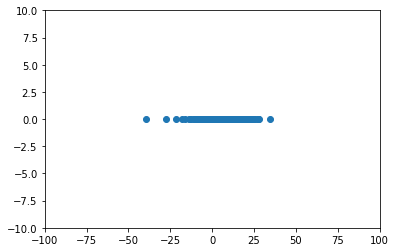

6.896795999999999


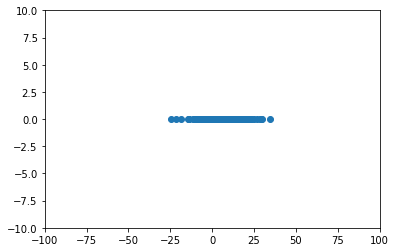

6.2030449999999995


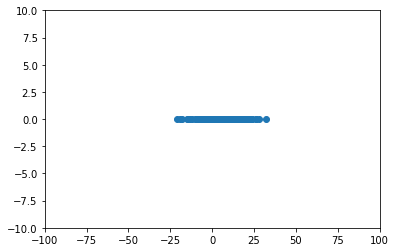

7.1763935


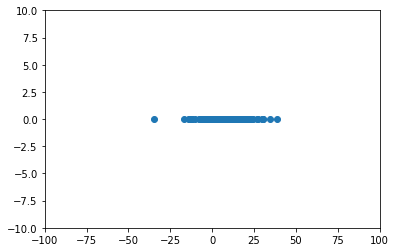

7.371188000000001


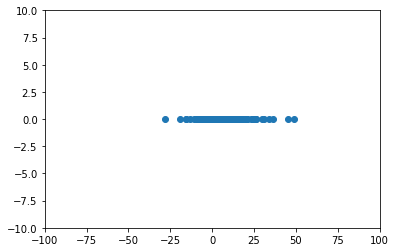

5.6154955


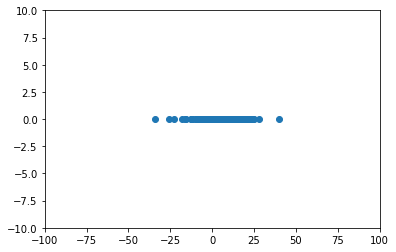

6.8600125


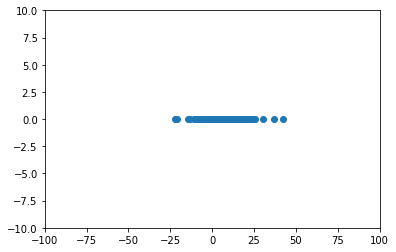

7.015660499999999


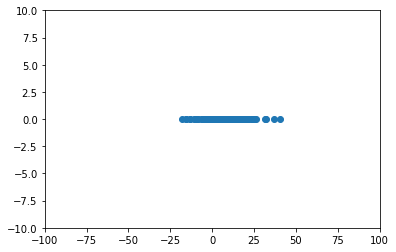

6.9523065


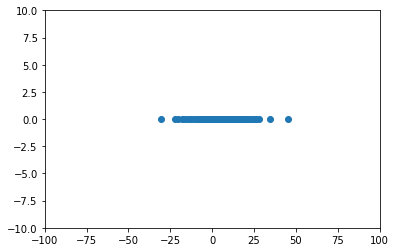

6.3272070000000005


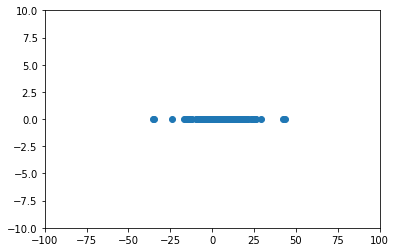

6.765835000000001


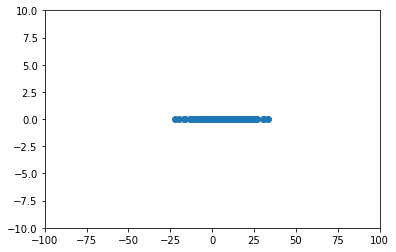

6.937479


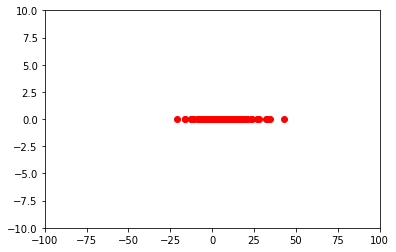

6.581139499999999


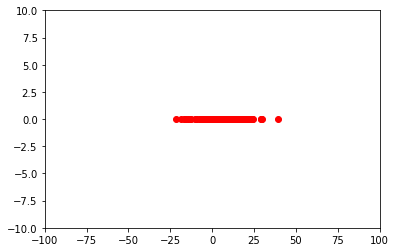

6.712044500000001


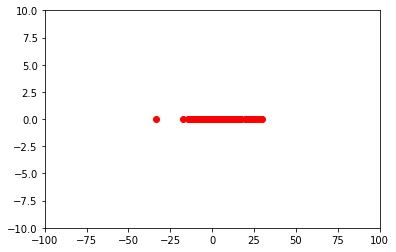

6.580170000000001


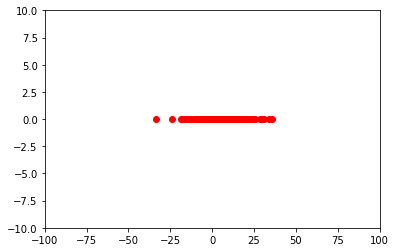

7.6213995


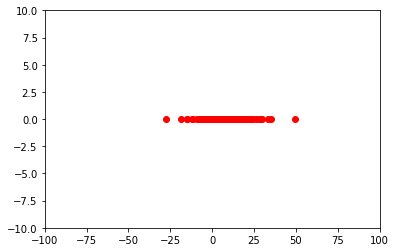

6.6866445


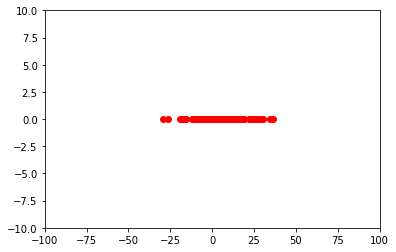

7.516323000000001


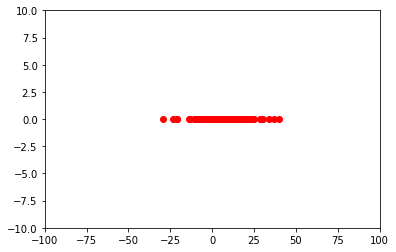

7.2402265


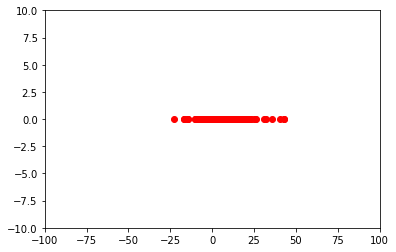

7.035648999999999


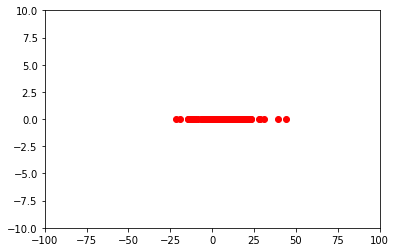

6.523801


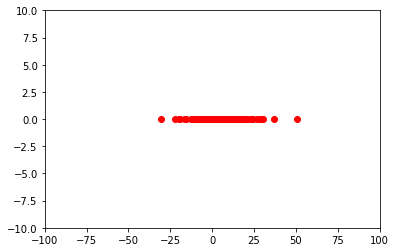

5.835604999999999


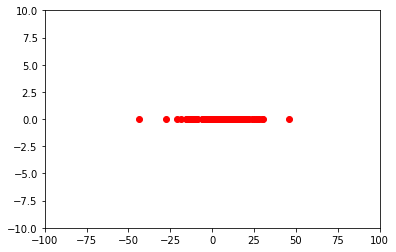

6.680623999999999


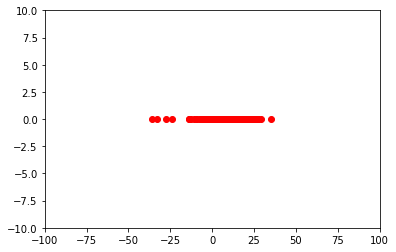

6.851173999999999


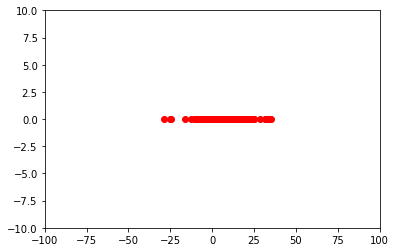

6.716484


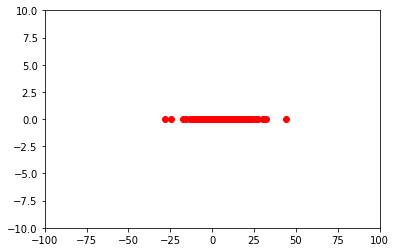

7.2061835


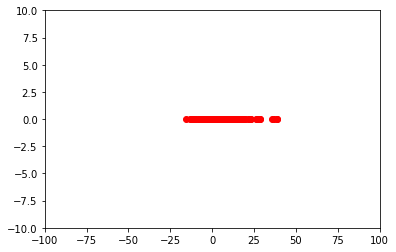

6.529418499999999


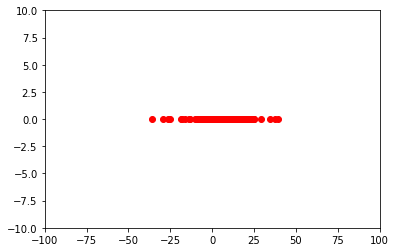

6.964468


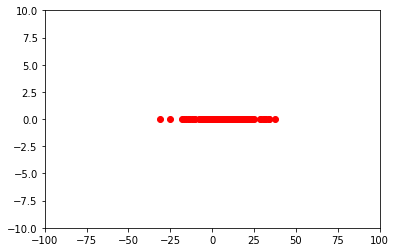

6.890304000000001


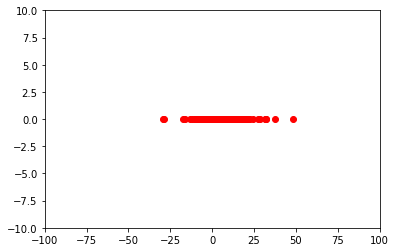

7.3271155


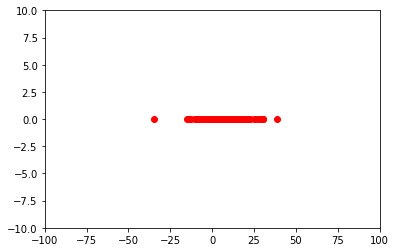

6.5504869999999995


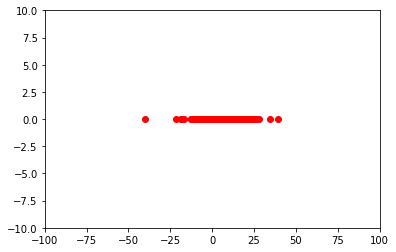

In [5]:
x_train_0=x_train[y_train==0]
for i in range(0,20):
    x=x_train_0[i:(i+1)].values
    print(x.mean())
    plt.scatter(x,np.zeros(200))
    plt.xlim(-100,100)
    plt.ylim(-10,10)
    plt.show()

x_train_1 = x_train[y_train==1]
for j in range(0,20):
    x=x_train_1[j:(j+1)].values
    print(x.mean())
    plt.scatter(x,np.zeros(200),color='red')
    plt.xlim(-100,100)
    plt.ylim(-10,10)
    plt.show()
    plt.close()


In [6]:
pd.set_option('display.max_columns', 500)
x_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0000

色々な切り口からvarを組み合わせて、mean,negative val,mean negative valの差分を確認

平均 0-20

In [7]:

for k in range(0,20):
    var_list = []
    var_0_mean_list = []
    var_1_mean_list = []
    var_0_neg_list = []
    var_1_neg_list = []
    var_0_mean_neg_list = []
    var_1_mean_neg_list = []
    range_par=1

    for i in x_train.columns:
        std=x_train[i].std()
        abs_mean=abs(x_train[i].mean())
        mean=x_train[i].mean()
        if k/range_par < mean and mean <=(k+1)/range_par :
            var_list.append(i)
            
    x_train_varlist=x_train[var_list]
    x_train_0=x_train_varlist[y_train==0]
    for i in range(0,1000):
        x=x_train_0[i:(i+1)].values
        var_0_mean_list.append(x.mean())
        var_0_neg_list.append(np.sum(x<0))
        var_0_mean_neg_list.append(np.sum(x<x.mean()))

        '''
        plt.scatter(x,np.zeros(len(var_list)))
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        '''

    x_train_1 = x_train_varlist[y_train==1]
    for j in range(0,1000):
        x=x_train_1[j:(j+1)].values
        var_1_mean_list.append(x.mean())
        var_1_neg_list.append(np.sum(x<0))
        var_1_mean_neg_list.append(np.sum(x<x.mean()))
        
        '''
        plt.scatter(x,np.zeros(len(var_list)),color='red')    
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        plt.close()
        '''
    print(str(k)+"～"+str(k+1))
    print(" ")
    print(var_list)
    
    mean_0 =sum(var_0_mean_list)/len(var_0_mean_list)
    mean_1 =sum(var_1_mean_list)/len(var_1_mean_list)
    print(mean_0-mean_1)
    print(mean_0)
    print(mean_1)
    print(" ")
    neg_0=sum(var_0_neg_list)/len(var_0_neg_list)
    neg_1=sum(var_1_neg_list)/len(var_1_neg_list)
    print(neg_0-neg_1)
    print(neg_0)
    print(neg_1)
    print(" ")
    neg_mean_0=sum(var_0_mean_neg_list)/len(var_0_mean_neg_list)
    neg_mean_1=sum(var_1_mean_neg_list)/len(var_1_mean_neg_list)
    print(neg_mean_0-neg_mean_1)
    print(neg_mean_0)
    print(neg_mean_1)
    print(" ")
    

0～1
 
['var_8', 'var_10', 'var_39', 'var_62', 'var_63', 'var_65', 'var_71', 'var_72', 'var_127', 'var_131', 'var_182', 'var_189']
0.09744104999999881
0.6859074499999989
0.5884664000000001
 
-0.11900000000000066
4.228
4.347
 
0.052999999999999936
5.973
5.92
 
1～2
 
['var_54', 'var_83', 'var_98', 'var_103', 'var_122', 'var_138', 'var_192']
0.11917525714285748
1.3560149428571442
1.2368396857142867
 
0.015999999999999792
1.876
1.86
 
0.04400000000000004
3.358
3.314
 
2～3
 
['var_36', 'var_115', 'var_116', 'var_141', 'var_166', 'var_179', 'var_196']
0.15849812857142354
2.5288973857142834
2.37039925714286
 
-0.137
1.401
1.538
 
-0.07299999999999995
3.429
3.502
 
3～4
 
['var_23', 'var_35', 'var_58', 'var_89', 'var_112', 'var_114', 'var_119', 'var_140', 'var_148', 'var_190', 'var_193']
-0.08911004545454482
3.4183518909090895
3.5074619363636343
 
-0.04699999999999993
1.558
1.605
 
-0.12300000000000022
5.504
5.627
 
4～5
 
['var_22', 'var_105', 'var_124', 'var_145', 'var_168']
-0.2571627999999917

平均の絶対値による抜き取りアプローチ

In [8]:
for k in range(0,10):
    var_list = []
    var_0_mean_list = []
    var_1_mean_list = []
    var_0_neg_list = []
    var_1_neg_list = []
    var_0_mean_neg_list = []
    var_1_mean_neg_list = []
    range_par=2

    for i in x_train.columns:
        std=x_train[i].std()
        abs_mean=abs(x_train[i].mean())
        mean=x_train[i].mean()
        if k/range_par < abs_mean and abs_mean <=(k+1)/range_par :
            var_list.append(i)
            
    x_train_varlist=x_train[var_list]
    x_train_0=x_train_varlist[y_train==0]
    for i in range(0,1000):
        x=x_train_0[i:(i+1)].values
        var_0_mean_list.append(x.mean())
        var_0_neg_list.append(np.sum(x<0))
        var_0_mean_neg_list.append(np.sum(x<x.mean()))

        '''
        plt.scatter(x,np.zeros(len(var_list)))
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        '''

    x_train_1 = x_train_varlist[y_train==1]
    for j in range(0,1000):
        x=x_train_1[j:(j+1)].values
        var_1_mean_list.append(x.mean())
        var_1_neg_list.append(np.sum(x<0))
        var_1_mean_neg_list.append(np.sum(x<x.mean()))
        
        '''
        plt.scatter(x,np.zeros(len(var_list)),color='red')    
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        plt.close()
        '''
    print(str(k)+"～"+str(k+1))
    print(" ")
    print(var_list)
    
    mean_0 =sum(var_0_mean_list)/len(var_0_mean_list)
    mean_1 =sum(var_1_mean_list)/len(var_1_mean_list)
    print(mean_0-mean_1)
    print(mean_0)
    print(mean_1)
    print(" ")
    neg_0=sum(var_0_neg_list)/len(var_0_neg_list)
    neg_1=sum(var_1_neg_list)/len(var_1_neg_list)
    print(neg_0-neg_1)
    print(neg_0)
    print(neg_1)
    print(" ")
    neg_mean_0=sum(var_0_mean_neg_list)/len(var_0_mean_neg_list)
    neg_mean_1=sum(var_1_mean_neg_list)/len(var_1_mean_neg_list)
    print(neg_mean_0-neg_mean_1)
    print(neg_mean_0)
    print(neg_mean_1)
    print(" ")
    

0～1
 
['var_8', 'var_10', 'var_95', 'var_170', 'var_195']
-0.1643906799999998
0.06625321999999996
0.23064389999999974
 
0.0990000000000002
2.512
2.413
 
-0.06400000000000006
2.521
2.585
 
1～2
 
['var_32', 'var_39', 'var_62', 'var_63', 'var_65', 'var_71', 'var_72', 'var_99', 'var_127', 'var_131', 'var_171', 'var_173', 'var_182', 'var_189']
-0.021066400000000096
0.3288988928571425
0.3499652928571426
 
0.004999999999999893
5.611
5.606
 
0.02200000000000024
6.804
6.782
 
2～3
 
['var_27', 'var_54', 'var_83', 'var_122', 'var_128', 'var_138', 'var_178']
0.15501000000000006
0.1267533428571429
-0.028256657142857165
 
0.040999999999999925
3.686
3.645
 
0.052000000000000046
3.616
3.564
 
3～4
 
['var_1', 'var_98', 'var_103', 'var_192']
-0.18019240000000103
0.8846766999999993
1.0648691000000003
 
0.06300000000000006
0.763
0.7
 
-0.14300000000000002
1.558
1.701
 
4～5
 
['var_36', 'var_115', 'var_116', 'var_155', 'var_196']
0.12794616000000425
1.4782801800000032
1.350334019999999
 
-0.139999999999999

分散による切り取りアプローチ

In [9]:
for k in range(0,100):
    var_list = []
    var_0_mean_list = []
    var_1_mean_list = []
    var_0_neg_list = []
    var_1_neg_list = []
    var_0_mean_neg_list = []
    var_1_mean_neg_list = []
    range_par=5

    for i in x_train.columns:
        std=x_train[i].std()
        abs_mean=abs(x_train[i].mean())
        mean=x_train[i].mean()
        if k/range_par < std and std <=(k+1)/range_par :
            var_list.append(i)
            
    x_train_varlist=x_train[var_list]
    x_train_0=x_train_varlist[y_train==0]
    for i in range(0,1000):
        x=x_train_0[i:(i+1)].values
        var_0_mean_list.append(x.mean())
        var_0_neg_list.append(np.sum(x<0))
        var_0_mean_neg_list.append(np.sum(x<x.mean()))

        '''
        plt.scatter(x,np.zeros(len(var_list)))
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        '''

    x_train_1 = x_train_varlist[y_train==1]
    for j in range(0,1000):
        x=x_train_1[j:(j+1)].values
        var_1_mean_list.append(x.mean())
        var_1_neg_list.append(np.sum(x<0))
        var_1_mean_neg_list.append(np.sum(x<x.mean()))
        
        '''
        plt.scatter(x,np.zeros(len(var_list)),color='red')    
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        plt.close()
        '''
    print(str(k)+"～"+str(k+1))
    print(" ")
    print(var_list)
    
    mean_0 =sum(var_0_mean_list)/len(var_0_mean_list)
    mean_1 =sum(var_1_mean_list)/len(var_1_mean_list)
    print(mean_0-mean_1)
    print(mean_0)
    print(mean_1)
    print(" ")
    neg_0=sum(var_0_neg_list)/len(var_0_neg_list)
    neg_1=sum(var_1_neg_list)/len(var_1_neg_list)
    print(neg_0-neg_1)
    print(neg_0)
    print(neg_1)
    print(" ")
    neg_mean_0=sum(var_0_mean_neg_list)/len(var_0_mean_neg_list)
    neg_mean_1=sum(var_1_mean_neg_list)/len(var_1_mean_neg_list)
    print(neg_mean_0-neg_mean_1)
    print(neg_mean_0)
    print(neg_mean_1)
    print(" ")
    

0～1
 
['var_12', 'var_68', 'var_91', 'var_103', 'var_108', 'var_148']
0.007584933333343535
7.633547666666671
7.625962733333328
 
0.0
0.0
0.0
 
0.0
4.0
4.0
 
1～2
 
['var_25', 'var_43', 'var_71', 'var_125', 'var_133', 'var_161', 'var_166', 'var_169']
0.007734474999993246
7.43239099999999
7.424656524999997
 
-0.003
0.0
0.003
 
0.040000000000000036
4.966
4.926
 
2～3
 
['var_15', 'var_23', 'var_34', 'var_93', 'var_131']
0.05744191999999959
8.032202839999998
7.974760919999999
 
-0.032
0.126
0.158
 
0.0
2.0
2.0
 
3～4
 
['var_28', 'var_42', 'var_50', 'var_53', 'var_57', 'var_95', 'var_98', 'var_126']
-0.010290400000001476
7.081567349999999
7.091857750000001
 
0.07000000000000006
0.554
0.484
 
0.04400000000000048
4.777
4.733
 
4～5
 
['var_6', 'var_59', 'var_105', 'var_114', 'var_130', 'var_144', 'var_156', 'var_189', 'var_197']
0.0015511444444511469
7.271288566666673
7.269737422222222
 
0.022999999999999993
0.255
0.232
 
-0.008000000000000007
4.095
4.103
 
5～6
 
['var_66', 'var_111']
-0.1226217

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice.


32～33
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
33～34
 
['var_17', 'var_141']
0.11943899999999918
-1.4761809499999992
-1.5956199499999983
 
-0.01100000000000012
1.152
1.163
 
0.0
1.0
1.0
 
34～35
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
35～36
 
['var_174']
1.120142700000006
20.265896700000013
19.145754000000007
 
0.001
0.001
0.0
 
0.0
0.0
0.0
 
36～37
 
['var_67']
-1.157690999999998
12.002751000000005
13.160442000000003
 
0.012999999999999998
0.051
0.038
 
0.0
0.0
0.0
 
37～38
 
['var_73', 'var_80', 'var_147', 'var_176']
-0.031139225000002213
4.767251849999996
4.798391074999998
 
0.006000000000000005
1.491
1.485
 
-0.040000000000000036
2.189
2.229
 
38～39
 
['var_86', 'var_107', 'var_135', 'var_139', 'var_167']
0.7114495599999993
4.786353520000002
4.074903960000003
 
-0.1260000000000001
1.744
1.87
 
-0.02900000000000036
2.542
2.571
 
39～40
 
['var_5', 'var_18', 'var_19', 'var_30', 'var_49', 'var_76', 'var_158']
-0.13599532857143348
7.943217757142857
8.07921308571429
 
-0.084999

In [10]:
for k in range(10,30):
    var_list = []
    var_0_mean_list = []
    var_1_mean_list = []
    var_0_neg_list = []
    var_1_neg_list = []
    var_0_mean_neg_list = []
    var_1_mean_neg_list = []
    range_par=1

    for i in x_train.columns:
        std=x_train[i].std()
        abs_mean=abs(x_train[i].mean())
        mean=x_train[i].mean()
        if k/range_par < std and std <=(k+1)/range_par :
            var_list.append(i)
            
    x_train_varlist=x_train[var_list]
    x_train_0=x_train_varlist[y_train==0]
    for i in range(0,1000):
        x=x_train_0[i:(i+1)].values
        var_0_mean_list.append(x.mean())
        var_0_neg_list.append(np.sum(x<0))
        var_0_mean_neg_list.append(np.sum(x<x.mean()))

        '''
        plt.scatter(x,np.zeros(len(var_list)))
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        '''

    x_train_1 = x_train_varlist[y_train==1]
    for j in range(0,1000):
        x=x_train_1[j:(j+1)].values
        var_1_mean_list.append(x.mean())
        var_1_neg_list.append(np.sum(x<0))
        var_1_mean_neg_list.append(np.sum(x<x.mean()))
        
        '''
        plt.scatter(x,np.zeros(len(var_list)),color='red')    
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        plt.close()
        '''
    print(str(k)+"～"+str(k+1))
    print(" ")
    print(var_list)
    
    mean_0 =sum(var_0_mean_list)/len(var_0_mean_list)
    mean_1 =sum(var_1_mean_list)/len(var_1_mean_list)
    print(mean_0-mean_1)
    print(mean_0)
    print(mean_1)
    print(" ")
    neg_0=sum(var_0_neg_list)/len(var_0_neg_list)
    neg_1=sum(var_1_neg_list)/len(var_1_neg_list)
    print(neg_0-neg_1)
    print(neg_0)
    print(neg_1)
    print(" ")
    neg_mean_0=sum(var_0_mean_neg_list)/len(var_0_mean_neg_list)
    neg_mean_1=sum(var_1_mean_neg_list)/len(var_1_mean_neg_list)
    print(neg_mean_0-neg_mean_1)
    print(neg_mean_0)
    print(neg_mean_1)
    print(" ")
    

10～11
 
['var_47', 'var_136', 'var_149', 'var_160', 'var_199']
0.07357091999999454
7.403454840000004
7.329883920000009
 
-0.026000000000000023
1.756
1.782
 
-0.05099999999999971
2.507
2.558
 
11～12
 
['var_48', 'var_61', 'var_70', 'var_187']
-0.6740808999999963
4.395113275000002
5.069194174999998
 
0.06499999999999995
1.738
1.673
 
0.0030000000000001137
2.049
2.046
 
12～13
 
['var_97', 'var_120']
-0.5491294499999455
21.319404400000025
21.86853384999997
 
0.020000000000000004
0.091
0.071
 
0.0
1.0
1.0
 
13～14
 
['var_90', 'var_117']
-0.4398015999999996
-0.1926774999999998
0.24712409999999982
 
0.04599999999999993
1.029
0.983
 
0.0
1.0
1.0
 
14～15
 
['var_74']
-0.8103626000000368
19.38139529999999
20.191757900000027
 
0.017
0.089
0.072
 
0.0
0.0
0.0
 


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice.


15～16
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
16～17
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
17～18
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
18～19
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
19～20
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
20～21
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
21～22
 
['var_45']
1.143004699999974
-12.655321200000007
-13.79832589999998
 
-0.030000000000000027
0.688
0.718
 
0.0
0.0
0.0
 
22～23
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
23～24
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
24～25
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
25～26
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
26～27
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
27～28
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
28～29
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
29～30
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 


Range(max-min)によるアプローチ

In [11]:
for k in range(0,50):
    var_list = []
    var_0_mean_list = []
    var_1_mean_list = []
    var_0_neg_list = []
    var_1_neg_list = []
    var_0_mean_neg_list = []
    var_1_mean_neg_list = []
    range_par=1

    for i in x_train.columns:
        std=x_train[i].std()
        abs_mean=abs(x_train[i].mean())
        mean=x_train[i].mean()
        val_range=x_train[i].max()-x_train[i].min()
        if k/range_par < val_range and val_range <=(k+1)/range_par :
            var_list.append(i)
            
    x_train_varlist=x_train[var_list]
    x_train_0=x_train_varlist[y_train==0]
    for i in range(0,1000):
        x=x_train_0[i:(i+1)].values
        var_0_mean_list.append(x.mean())
        var_0_neg_list.append(np.sum(x<0))
        var_0_mean_neg_list.append(np.sum(x<x.mean()))

        '''
        plt.scatter(x,np.zeros(len(var_list)))
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        '''

    x_train_1 = x_train_varlist[y_train==1]
    for j in range(0,1000):
        x=x_train_1[j:(j+1)].values
        var_1_mean_list.append(x.mean())
        var_1_neg_list.append(np.sum(x<0))
        var_1_mean_neg_list.append(np.sum(x<x.mean()))
        
        '''
        plt.scatter(x,np.zeros(len(var_list)),color='red')    
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        plt.close()
        '''
    print(str(k)+"～"+str(k+1))
    print(" ")
    print(var_list)
    
    mean_0 =sum(var_0_mean_list)/len(var_0_mean_list)
    mean_1 =sum(var_1_mean_list)/len(var_1_mean_list)
    print(mean_0-mean_1)
    print(mean_0)
    print(mean_1)
    print(" ")
    neg_0=sum(var_0_neg_list)/len(var_0_neg_list)
    neg_1=sum(var_1_neg_list)/len(var_1_neg_list)
    print(neg_0-neg_1)
    print(neg_0)
    print(neg_1)
    print(" ")
    neg_mean_0=sum(var_0_mean_neg_list)/len(var_0_mean_neg_list)
    neg_mean_1=sum(var_1_mean_neg_list)/len(var_1_mean_neg_list)
    print(neg_mean_0-neg_mean_1)
    print(neg_mean_0)
    print(neg_mean_1)
    print(" ")
    

0～1
 
['var_68', 'var_91']
-0.012284099999993359
6.001378249999998
6.013662349999992
 
0.0
0.0
0.0
 
0.0
1.0
1.0
 
1～2
 
['var_12', 'var_25', 'var_43', 'var_71', 'var_103', 'var_108', 'var_148', 'var_161']
0.0099813125000221
8.169739375000008
8.159758062499986
 
-0.003
0.0
0.003
 
0.0
4.0
4.0
 
2～3
 
['var_15', 'var_125', 'var_133', 'var_166', 'var_169']
0.0004356000000047544
8.489779839999999
8.489344239999994
 
0.0
0.0
0.0
 
0.0
3.0
3.0
 
3～4
 
['var_23', 'var_34', 'var_131']
0.07489576666667208
5.011417600000002
4.93652183333333
 
-0.032
0.126
0.158
 
0.0
2.0
2.0
 
4～5
 
['var_42', 'var_50', 'var_53', 'var_93', 'var_95', 'var_126']
-0.0172373333333411
8.941051149999995
8.958288483333336
 
0.07100000000000006
0.553
0.482
 
-0.004999999999999893
2.0
2.005
 
5～6
 
['var_57', 'var_59', 'var_98', 'var_130']
0.014896925000001282
7.308868924999991
7.2939719999999895
 
-0.001
0.001
0.002
 
-0.006999999999999895
1.927
1.934
 
6～7
 
['var_6', 'var_28', 'var_105', 'var_114', 'var_144', 'var_15

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.


45～46
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
46～47
 
['var_73', 'var_174']
0.4388247500000304
19.87486790000001
19.43604314999998
 
0.001
0.001
0.0
 
0.0
1.0
1.0
 
47～48
 
['var_19']
-0.5297081999999982
12.236176799999999
12.765884999999997
 
0.0
0.068
0.068
 
0.0
0.0
0.0
 
48～49
 
['var_80']
0.865226400000001
5.6513844000000075
4.786158000000007
 
-0.05500000000000002
0.212
0.267
 
0.0
0.0
0.0
 
49～50
 
['var_5', 'var_49', 'var_158', 'var_176']
-0.2812538749999991
6.707215550000003
6.988469425000002
 
0.04300000000000015
1.344
1.301
 
0.03599999999999981
2.018
1.982
 


バリエーションによる切り取り

In [12]:
for k in range(0,50):
    var_list = []
    var_0_mean_list = []
    var_1_mean_list = []
    var_0_neg_list = []
    var_1_neg_list = []
    var_0_mean_neg_list = []
    var_1_mean_neg_list = []
    range_par=1

    for i in x_train.columns:
        unique=x_train[i].nunique()
        std=x_train[i].std()
        abs_mean=abs(x_train[i].mean())
        mean=x_train[i].mean()
        val_range=x_train[i].max()-x_train[i].min()
        if (k*5000)/range_par < unique and unique <=((k+1)*5000)/range_par :
            var_list.append(i)
            
    x_train_varlist=x_train[var_list]
    x_train_0=x_train_varlist[y_train==0]
    for i in range(0,1000):
        x=x_train_0[i:(i+1)].values
        var_0_mean_list.append(x.mean())
        var_0_neg_list.append(np.sum(x<0))
        var_0_mean_neg_list.append(np.sum(x<x.mean()))

        '''
        plt.scatter(x,np.zeros(len(var_list)))
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        '''

    x_train_1 = x_train_varlist[y_train==1]
    for j in range(0,1000):
        x=x_train_1[j:(j+1)].values
        var_1_mean_list.append(x.mean())
        var_1_neg_list.append(np.sum(x<0))
        var_1_mean_neg_list.append(np.sum(x<x.mean()))
        
        '''
        plt.scatter(x,np.zeros(len(var_list)),color='red')    
        plt.xlim(-100,100)
        plt.ylim(-10,10)
        plt.show()
        plt.close()
        '''
    print(str(k)+"～"+str(k+1))
    print(" ")
    print(var_list)
    
    mean_0 =sum(var_0_mean_list)/len(var_0_mean_list)
    mean_1 =sum(var_1_mean_list)/len(var_1_mean_list)
    print(mean_0-mean_1)
    print(mean_0)
    print(mean_1)
    print(" ")
    neg_0=sum(var_0_neg_list)/len(var_0_neg_list)
    neg_1=sum(var_1_neg_list)/len(var_1_neg_list)
    print(neg_0-neg_1)
    print(neg_0)
    print(neg_1)
    print(" ")
    neg_mean_0=sum(var_0_mean_neg_list)/len(var_0_mean_neg_list)
    neg_mean_1=sum(var_1_mean_neg_list)/len(var_1_mean_neg_list)
    print(neg_mean_0-neg_mean_1)
    print(neg_mean_0)
    print(neg_mean_1)
    print(" ")
    

0～1
 
['var_68']
0.0008611999999983411
5.019230000000002
5.018368800000004
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
1～2
 
['var_12', 'var_91', 'var_103', 'var_108']
0.002671299999990495
9.196727574999995
9.194056275000005
 
0.0
0.0
0.0
 
0.0
2.0
2.0
 
2～3
 
['var_25', 'var_71', 'var_148', 'var_161']
0.0016558249999949481
5.995021600000003
5.993365775000008
 
-0.003
0.0
0.003
 
0.0050000000000003375
2.966
2.961
 
3～4
 
['var_15', 'var_43', 'var_125', 'var_133', 'var_166', 'var_169']
0.006548433333339432
9.003890666666676
8.997342233333336
 
0.0
0.0
0.0
 
0.0
3.0
3.0
 
4～5
 
['var_23', 'var_131']
0.06568054999999862
1.7876396000000003
1.7219590500000017
 
-0.032
0.126
0.158
 
0.0
1.0
1.0
 
5～6
 
['var_34', 'var_93', 'var_95']
0.0383343333333368
7.317800100000006
7.279465766666669
 
0.07100000000000006
0.553
0.482
 
0.0
1.0
1.0
 
6～7
 
['var_42', 'var_50', 'var_53', 'var_98', 'var_126']
-0.02620422000001099
8.978107399999981
9.004311619999992
 
-0.001
0.001
0.002
 
0.0
2.0
2.0
 
7～8
 
['var_6', 'var

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.


34～35
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
35～36
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
36～37
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
37～38
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
38～39
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
39～40
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
40～41
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
41～42
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
42～43
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
43～44
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
44～45
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
45～46
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
46～47
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
47～48
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
48～49
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 
49～50
 
[]
nan
nan
nan
 
0.0
0.0
0.0
 
0.0
0.0
0.0
 


In [13]:
for i in x_train.columns:
    print(x_train[i].nunique())

94672
108932
86555
74597
63515
141029
38599
103063
98617
49417
128764
130193
9561
115181
79122
19810
86918
137823
139515
144180
127764
140062
90660
24913
105101
14853
127089
60185
35859
88339
145977
77388
85964
112239
25164
122384
96404
79040
115366
112674
141878
131896
31592
15188
127702
169968
93450
154781
152039
140641
32308
143455
121313
33460
144776
128077
103045
35545
113907
37744
113763
159369
74777
97098
59379
108347
47722
137253
451
110346
153193
13527
110114
142582
161058
129383
139317
106809
72254
53212
136432
79065
144829
144281
133766
108437
140594
125296
84918
103522
157210
7962
110743
26708
89146
29387
148099
158739
33266
69300
150727
122295
146237
9376
72627
39115
71065
137827
8525
112172
106121
46464
60482
116496
43084
86729
63467
164469
143667
112403
158269
64695
121767
129893
91022
16059
32411
95710
98200
113425
36638
21464
57923
19236
131619
140774
156615
144397
117428
137294
121384
134443
128613
94372
40595
108526
84314
137559
10608
148504
83660
109667
95823
73728


◆平均による抜き取りアプローチ

['var_22', 'var_105', 'var_124', 'var_145', 'var_168']
-0.2571627999999917

['var_9', 'var_14', 'var_123', 'var_132', 'var_139', 'var_152', 'var_191']
0.3919924857142698

['var_13', 'var_44', 'var_59', 'var_88', 'var_106', 'var_113', 'var_144', 'var_183', 'var_186', 'var_197']
0.26888488000001054

['var_16', 'var_41']
-0.26842139999999937

['var_19', 'var_50', 'var_55', 'var_60', 'var_92', 'var_125', 'var_130', 'var_143', 'var_184']
-0.24531745555555595

['var_21', 'var_107', 'var_137', 'var_158', 'var_194']
0.5149912599999666

['var_85', 'var_97', 'var_109']
-0.2441874666666699

◆平均の絶対値による抜き取りアプローチ

['var_11', 'var_23', 'var_35', 'var_58', 'var_69', 'var_82', 'var_89', 'var_112', 'var_114', 'var_119', 'var_140', 'var_147', 'var_148', 'var_185', 'var_190', 'var_193', 'var_199']
-0.2796839941176469

['var_22', 'var_26', 'var_105', 'var_124', 'var_134', 'var_135', 'var_145', 'var_157', 'var_167', 'var_168']
-0.5054556300000002

['var_95', 'var_170']
-0.34413759999999993

['var_52', 'var_84', 'var_141', 'var_164', 'var_166', 'var_176', 'var_179', 'var_180']
-0.31268278750000017

['var_11', 'var_23', 'var_58', 'var_69', 'var_82', 'var_112', 'var_114', 'var_119', 'var_140', 'var_147', 'var_190', 'var_193', 'var_199']
-0.2911079230769238

['var_134', 'var_145', 'var_157', 'var_168']
-0.4892769250000004

◆分散による抜き取りアプローチ

['var_8', 'var_128']
-0.2317340999999999

['var_24', 'var_65']
-0.23219690000000526

['var_33', 'var_38', 'var_58', 'var_60', 'var_109']
0.35500081999998656

['var_113', 'var_138', 'var_170', 'var_183', 'var_190']
-0.2910898799999968

['var_35', 'var_122', 'var_165']
0.3871742666666611

['var_163', 'var_171', 'var_180']
-0.4602653999999968

['var_10', 'var_157', 'var_164', 'var_196']
-0.41664622500000015

['var_11', 'var_20', 'var_26', 'var_41', 'var_44', 'var_173']
-0.24608410000000447

['var_75', 'var_123', 'var_134']
0.44589093333333985

['var_86', 'var_107', 'var_135', 'var_139', 'var_167']
0.7114495599999993

['var_40', 'var_83']
-0.7229829500000005

['var_136', 'var_149']
1.1047368999999971

['var_47', 'var_199']
-0.8270379000000085

['var_48', 'var_61', 'var_70', 'var_187']
-0.6740808999999963

['var_97', 'var_120']
-0.5491294499999455

['var_90', 'var_117']
-0.4398015999999996

◆Range(max-min)によるアプローチ

['var_32', 'var_81', 'var_177']
0.24315203333333102

['var_2', 'var_16', 'var_29', 'var_175']
-0.3113862000000154

['var_31', 'var_115']
0.381902649999998

['var_7', 'var_36', 'var_124']
0.21384943333334228

['var_1', 'var_85', 'var_89', 'var_119']
-0.2600723000000018

['var_24', 'var_56', 'var_72', 'var_109']
0.28768415000000047

['var_13', 'var_33', 'var_92', 'var_101', 'var_110', 'var_183']
0.2824189999999742

['var_55', 'var_164', 'var_190', 'var_196']
-0.5233287250000012

['var_58', 'var_122']
0.4762338999999969

['var_138', 'var_185']
-0.3945273500000004

['var_35', 'var_155']
-0.43120709999999773

['var_52', 'var_87', 'var_173']
-0.3336561000000029

['var_73', 'var_174']
0.4388247500000304

['var_5', 'var_49', 'var_158', 'var_176']
-0.2812538749999991

◆バリエーションによる切り取り

['var_47', 'var_48', 'var_61', 'var_70', 'var_90', 'var_97', 'var_100', 'var_120', 'var_136', 'var_160', 'var_187']
-0.511485690909085

['var_88', 'var_146', 'var_150']
0.27928923333332634

['var_1', 'var_24', 'var_65', 'var_77', 'var_85', 'var_110', 'var_145', 'var_151', 'var_188']
-0.2426609666666817

['var_13', 'var_38', 'var_113', 'var_138', 'var_154', 'var_165', 'var_183']
0.3002354714285662

['var_35', 'var_52', 'var_101', 'var_122', 'var_140', 'var_163', 'var_164', 'var_180', 'var_185']
-0.2983571999999981

['var_17', 'var_18', 'var_67', 'var_76', 'var_80', 'var_107', 'var_139', 'var_147']
0.38733321250000774

['var_5', 'var_19', 'var_21', 'var_40', 'var_49', 'var_51', 'var_54', 'var_73', 'var_82', 'var_83', 'var_86', 'var_118', 'var_135', 'var_137', 'var_158', 'var_167', 'var_172', 'var_176']
-0.2551959666666699

['var_47', 'var_48', 'var_70', 'var_100']
-0.6422458500000001

['var_61', 'var_90', 'var_97', 'var_120', 'var_136', 'var_160', 'var_187']
-0.4367656000000082

['var_74', 'var_117']
-0.4948865499999968



In [14]:
mean_var_list=[
 ['var_22', 'var_105', 'var_124', 'var_145', 'var_168']
,['var_9', 'var_14', 'var_123', 'var_132', 'var_139', 'var_152', 'var_191']
,['var_13', 'var_44', 'var_59', 'var_88', 'var_106', 'var_113', 'var_144', 'var_183', 'var_186', 'var_197']
,['var_16', 'var_41']
,['var_19', 'var_50', 'var_55', 'var_60', 'var_92', 'var_125', 'var_130', 'var_143', 'var_184']
,['var_21', 'var_107', 'var_137', 'var_158', 'var_194']
,['var_85', 'var_97', 'var_109']
,['var_11', 'var_23', 'var_35', 'var_58', 'var_69', 'var_82', 'var_89', 'var_112', 'var_114', 'var_119', 'var_140', 'var_147', 'var_148', 'var_185', 'var_190', 'var_193', 'var_199']
,['var_22', 'var_26', 'var_105', 'var_124', 'var_134', 'var_135', 'var_145', 'var_157', 'var_167', 'var_168']
,['var_95', 'var_170']
,['var_52', 'var_84', 'var_141', 'var_164', 'var_166', 'var_176', 'var_179', 'var_180']
,['var_11', 'var_23', 'var_58', 'var_69', 'var_82', 'var_112', 'var_114', 'var_119', 'var_140', 'var_147', 'var_190', 'var_193', 'var_199']
,['var_134', 'var_145', 'var_157', 'var_168']
,['var_8', 'var_128']
,['var_24', 'var_65']
,['var_33', 'var_38', 'var_58', 'var_60', 'var_109']
,['var_113', 'var_138', 'var_170', 'var_183', 'var_190']
,['var_35', 'var_122', 'var_165']
,['var_163', 'var_171', 'var_180']
,['var_10', 'var_157', 'var_164', 'var_196']
,['var_11', 'var_20', 'var_26', 'var_41', 'var_44', 'var_173']
,['var_75', 'var_123', 'var_134']
,['var_86', 'var_107', 'var_135', 'var_139', 'var_167']
,['var_40', 'var_83']
,['var_136', 'var_149']
,['var_47', 'var_199']
,['var_48', 'var_61', 'var_70', 'var_187']
,['var_97', 'var_120']
,['var_90', 'var_117']
,['var_32', 'var_81', 'var_177']
,['var_2', 'var_16', 'var_29', 'var_175']
,['var_31', 'var_115']
,['var_7', 'var_36', 'var_124']
,['var_1', 'var_85', 'var_89', 'var_119']
,['var_24', 'var_56', 'var_72', 'var_109']
,['var_13', 'var_33', 'var_92', 'var_101', 'var_110', 'var_183']
,['var_55', 'var_164', 'var_190', 'var_196']
,['var_58', 'var_122']
,['var_138', 'var_185']
,['var_35', 'var_155']
,['var_52', 'var_87', 'var_173']
,['var_73', 'var_174']
,['var_5', 'var_49', 'var_158', 'var_176']
,['var_47', 'var_48', 'var_61', 'var_70', 'var_90', 'var_97', 'var_100', 'var_120', 'var_136', 'var_160', 'var_187']
,['var_88', 'var_146', 'var_150']
,['var_1', 'var_24', 'var_65', 'var_77', 'var_85', 'var_110', 'var_145', 'var_151', 'var_188']
,['var_13', 'var_38', 'var_113', 'var_138', 'var_154', 'var_165', 'var_183']
,['var_35', 'var_52', 'var_101', 'var_122', 'var_140', 'var_163', 'var_164', 'var_180', 'var_185']
,['var_17', 'var_18', 'var_67', 'var_76', 'var_80', 'var_107', 'var_139', 'var_147']
,['var_5', 'var_19', 'var_21', 'var_40', 'var_49', 'var_51', 'var_54', 'var_73', 'var_82', 'var_83', 'var_86', 'var_118', 'var_135', 'var_137', 'var_158', 'var_167', 'var_172', 'var_176']
,['var_47', 'var_48', 'var_70', 'var_100']
,['var_61', 'var_90', 'var_97', 'var_120', 'var_136', 'var_160', 'var_187']
,['var_74', 'var_117']
]

In [15]:
mean_var_list

[['var_22', 'var_105', 'var_124', 'var_145', 'var_168'],
 ['var_9', 'var_14', 'var_123', 'var_132', 'var_139', 'var_152', 'var_191'],
 ['var_13',
  'var_44',
  'var_59',
  'var_88',
  'var_106',
  'var_113',
  'var_144',
  'var_183',
  'var_186',
  'var_197'],
 ['var_16', 'var_41'],
 ['var_19',
  'var_50',
  'var_55',
  'var_60',
  'var_92',
  'var_125',
  'var_130',
  'var_143',
  'var_184'],
 ['var_21', 'var_107', 'var_137', 'var_158', 'var_194'],
 ['var_85', 'var_97', 'var_109'],
 ['var_11',
  'var_23',
  'var_35',
  'var_58',
  'var_69',
  'var_82',
  'var_89',
  'var_112',
  'var_114',
  'var_119',
  'var_140',
  'var_147',
  'var_148',
  'var_185',
  'var_190',
  'var_193',
  'var_199'],
 ['var_22',
  'var_26',
  'var_105',
  'var_124',
  'var_134',
  'var_135',
  'var_145',
  'var_157',
  'var_167',
  'var_168'],
 ['var_95', 'var_170'],
 ['var_52',
  'var_84',
  'var_141',
  'var_164',
  'var_166',
  'var_176',
  'var_179',
  'var_180'],
 ['var_11',
  'var_23',
  'var_58',
  'va

In [16]:
#x,y作成
x_train=train_df.drop(train_drop_col,axis=1)
y_train=train_df[train_label]
x_test=test_df.drop(test_drop_col,axis=1)

In [17]:
for i,val in enumerate(mean_var_list):
    x_train["mean_"+str(i)]=x_train[val].mean(axis=1)
    x_train["negCount_"+str(i)]=(x_train[val] < 0).sum(axis=1)
    x_test["mean_"+str(i)]=x_test[val].mean(axis=1)
    x_test["negCount_"+str(i)]=(x_test[val] < 0).sum(axis=1)
    
x_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,mean_0,negCount_0,mean_1,negCount_1,mean_2,negCount_2,mean_3,negCount_3,mean_4,negCount_4,mean_5,negCount_5,mean_6,negCount_6,mean_7,negCount_7,mean_8,negCount_8,mean_9,negCount_9,mean_10,negCount_10,mean_11,negCount_11,mean_12,negCount_12,mean_13,negCount_13,mean_14,negCount_14,mean_15,negCount_15,mean_16,negCount_16,mean_17,negCount_17,mean_18,negCount_18,mean_19,negCount_19,mean_20,negCount_20,mean_21,negCount_21,mean_22,negCount_22,mean_23,negCount_23,mean_24,negCount_24,mean_25,negCount_25,mean_26,negCount_26,mean_27,negCount_27,mean_28,negCount_28,mean_29,negCount_29,mean_30,negCount_30,mean_31,negCount_31,mean_32,negCount_32,mean_33,negCount_33,mean_34,negCount_34,mean_35,negCount_35,mean_36,negCount_36,mean_37,negCount_37,mean_38,negCount_38,mean_39,negCount_39,mean_40,negCount_40,mean_41,negCount_41,mean_42,negCount_42,mean_43,negCount_43,mean_44,negCount_44,mean_45,negCount_45,mean_46,negCount_46,mean_47,negCount_47,mean_48,negCount_48,mean_49,negCount_49,mean_50,negCount_50,mean_51,negCount_51,mean_52,negCount_52
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6

In [20]:
for i in x_train.columns:
    if 'negCount' in str(i) or 'mean' in str(i):
        print(i)
    else:
        x_train=x_train.drop(i, axis=1)
        x_test=x_test.drop(i, axis=1)

mean_0
negCount_0
mean_1
negCount_1
mean_2
negCount_2
mean_3
negCount_3
mean_4
negCount_4
mean_5
negCount_5
mean_6
negCount_6
mean_7
negCount_7
mean_8
negCount_8
mean_9
negCount_9
mean_10
negCount_10
mean_11
negCount_11
mean_12
negCount_12
mean_13
negCount_13
mean_14
negCount_14
mean_15
negCount_15
mean_16
negCount_16
mean_17
negCount_17
mean_18
negCount_18
mean_19
negCount_19
mean_20
negCount_20
mean_21
negCount_21
mean_22
negCount_22
mean_23
negCount_23
mean_24
negCount_24
mean_25
negCount_25
mean_26
negCount_26
mean_27
negCount_27
mean_28
negCount_28
mean_29
negCount_29
mean_30
negCount_30
mean_31
negCount_31
mean_32
negCount_32
mean_33
negCount_33
mean_34
negCount_34
mean_35
negCount_35
mean_36
negCount_36
mean_37
negCount_37
mean_38
negCount_38
mean_39
negCount_39
mean_40
negCount_40
mean_41
negCount_41
mean_42
negCount_42
mean_43
negCount_43
mean_44
negCount_44
mean_45
negCount_45
mean_46
negCount_46
mean_47
negCount_47
mean_48
negCount_48
mean_49
negCount_49
mean_50
negCount_50


In [22]:
x_train.head()

,mean_0,negCount_0,mean_1,negCount_1,mean_2,negCount_2,mean_3,negCount_3,mean_4,negCount_4,mean_5,negCount_5,mean_6,negCount_6,mean_7,negCount_7,mean_8,negCount_8,mean_9,negCount_9,mean_10,negCount_10,mean_11,negCount_11,mean_12,negCount_12,mean_13,negCount_13,mean_14,negCount_14,mean_15,negCount_15,mean_16,negCount_16,mean_17,negCount_17,mean_18,negCount_18,mean_19,negCount_19,mean_20,negCount_20,mean_21,negCount_21,mean_22,negCount_22,mean_23,negCount_23,mean_24,negCount_24,mean_25,negCount_25,mean_26,negCount_26,mean_27,negCount_27,mean_28,negCount_28,mean_29,negCount_29,mean_30,negCount_30,mean_31,negCount_31,mean_32,negCount_32,mean_33,negCount_33,mean_34,negCount_34,mean_35,negCount_35,mean_36,negCount_36,mean_37,negCount_37,mean_38,negCount_38,mean_39,negCount_39,mean_40,negCount_40,mean_41,negCount_41,mean_42,negCount_42,mean_43,negCount_43,mean_44,negCount_44,mean_45,negCount_45,mean_46,negCount_46,mean_47,negCount_47,mean_48,negCount_48,mean_49,negCount_49,mean_50,negCount_50,mean_51,negCount_51,mean_52,negCount_52
0,6.16276,0,7.657400,0,8.28614,1,6.56165,0,16.408756,0,20.18142,0,20.695600,0,1.983547,4,2.01422,3,-2.29165,1,-2.281175,5,1.149500,3,2.501925,1,-3.42225,2,11.95750,0,12.82432,0,3.27656,2,8.044200,0,-3.930700,2,1.086800,1,5.122967,1,8.109867,0,8.91496,1,-1.14820,1,23.68955,0,-7.65250,2,5.727200,1,16.13330,0,-2.93710,1,7.894900,1,7.84890,0,7.20670,0,7.841600,0,5.061900,2,13.803125,0,9.711600,0,8.455500,0,1.4540,0,4.35215,0,6.11790,0,6.306267,1,13.71090,0,0.880700,2,6.718273,3,12.694000,0,11.195778,1,6.443043,1,4.622311,2,5.890275,3,7.628006,6,8.23210,1,5.853229,2,29.34395,0
1,5.25070,0,8.965200,0,7.67884,0,7.85025,0,14.993933,0,18.16252,0,17.853533,0,4.753147,1,0.70737,3,2.13280,1,-0.809813,5,5.264454,0,1.804350,1,1.98310,0,4.25720,0,10.64094,0,5.83498,1,8.049333,0,5.113300,1,-1.745975,3,1.391600,1,6.391000,0,6.99760,2,-7.96785,2,2.67870,1,1.07330,0,12.947750,2,29.13900,0,4.16450,0,12.012067,0,9.68280,0,6.01620,0,6.485267,0,7.345100,1,10.638925,0,10.054433,0,7.339050,1,5.0973,0,-3.41715,2,0.46485,0,4.168133,1,25.18565,0,11.976675,1,12.391809,3,12.484900,0,9.724656,1,7.112900,2,1.930278,4,8.248450,1,5.794794,7,15.36610,1,10.692214,2,7.81815,0
2,4.11794,0,6.140043,1,6.59717,0,4.96105,0,13.445800,0,19.56678,0,18.833833,0,1.755159,3,-0.25479,4,-3.41400,1,0.472350,4,1.908685,2,3.463975,1,-2.93360,2,2.28805,1,12.80368,0,0.99632,1,9.131567,0,-0.830333,2,-2.412400,4,-0.163633,3,7.069233,1,-0.89600,3,-1.66610,1,11.63780,1,-2.69495,1,1.617375,2,19.09865,0,3.17970,1,7.445933,1,9.20570,0,7.69510,0,7.668700,0,5.145475,1,12.015200,0,9.922083,0,0.407000,2,1.9384,0,-0.73940,1,2.34325,0,1.481567,1,18.92695,0,7.843825,2,4.893945,5,12.577200,0,7.771444,2,6.101029,1,2.523000,3,5.481612,1,5.826233,7,4.23215,2,5.272114,3,24.24720,0
3,3.45938,0,5.254529,1,9.15681,0,4.85300,1,11.445567,1,17.45230,0,16.846100,0,1.534076,4,1.49533,3,-4.12355,2,3.084313,2,1.594823,2,0.268875,2,-1.13175,1,9.22130,0,9.77306,0,2.68778,2,5.098733,1,-2.018900,2,-3.231275,3,7.108267,1,1.992900,2,2.60178,2,-4.55950,2,14.96550,0,-22.08275,2,-8.260650,2,24.35650,0,15.25745,1,7.307500,1,7.65930,0,3.94740,1,8.600367,0,7.118525,1,10.567575,0,11.104517,0,0.712025,2,3.6391,0,-1.43655,2,-8.42640,2,9.710900,0,19.58350,0,9.599950,1,1.136627,5,11.048400,0,10.521244,1,10.222057,1,1.694633,4,8.978763,1,7.922311,5,-12.55440,2,8.960071,3,21.31525,0
4,6.30518,0,8.896471,0,8.46548,0,11.27780,0,12.036556,0,19.16150,0,26.033400,0,-1.066535,7,1.99594,3,0.73530,0,0.750925,4,-1.417208,6,-1.787975,2,5.95860,0,4.94375,1,15.50330,0,4.57000,1,9.063333,0,2.621200,2,-2.887250,2,5.967333,1,8.750200,1,7.27868,1,-6.15190,2,13.54190,0,-4.38300,1,4.543025,2,38.20125,0,-7.06010,1,8.949833,1,11.40695,0,2.92665,1,8.660200,0,5.396575,1,14.685125,1,10.159733,1,5.790325,1,3.6256,0,-2.60700,1,5.62150,0,7.033600,1,11.52855,0,10.153600,1,7.506945,4,13.239467,0,7.597056,3,10.863914,0,3.631978,3,2.621937,2,7.059922,6,4.27675,2,9.352771,2,10.57245,1


In [ ]:
x_train.to_csv('../../02_feature/114_train_kmeans.csv',index=False)
x_test.to_csv('../../02_feature/114_test_kmeans.csv',index=False)